In [1]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from underthesea import text_normalize
from underthesea import word_tokenize
from underthesea import classify
from underthesea import sentiment
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("F:\Project NLP\Huy's_data.csv",).drop(["Time", "Rating"], axis=1)
print(data.head())

                                         Review Text sentiment
0  Came here once to do endoscopy. Terrible servi...  Negative
1  Bệnh viện khá hiện đại. Vị trí thuận lợi đến v...   Neutral
2  Bệnh viện Đại học Y Dược là bệnh viện đa khoa,...  Positive
3  Lần đầu tiên đưa ba đi khám tổng quát tại Bệnh...  Positive
4  26/05/2023. 1 ngày trải nghiệm tại bv Đại Học ...  Positive


In [4]:
data["sentiment"] = data["sentiment"].replace({"Negative": 0, "Neutral": 1, "Positive": 2})
data

,Review Text,sentiment
0,Came here once to do endoscopy. Terrible servi...,0
1,Bệnh viện khá hiện đại. Vị trí thuận lợi đến v...,1
2,"Bệnh viện Đại học Y Dược là bệnh viện đa khoa,...",2
3,Lần đầu tiên đưa ba đi khám tổng quát tại Bệnh...,2
4,26/05/2023. 1 ngày trải nghiệm tại bv Đại Học ...,2
...,...,...
6254,Phai Chiu thoi vi qua nhieu nguoi bi benh nay...,2
6255,La chuyen da mo toi rat tin tuong nhung vi co ...,2
6256,Dog ng chan choi.ko co ai huog dan ca,1
6257,Tôi bất khả dĩ mới chọn bệnh viện này để khám....,0


In [5]:
data.shape

(6259, 2)

In [6]:
texts = data['Review Text']

In [7]:
import numpy as np

text_lens = []
for t in texts.values:
    if isinstance(t, str):
        text_len = len(t.split())
        text_lens.append(text_len)

len_mean = np.mean(text_lens)

In [8]:
len_mean

47.90222080204506

In [9]:
stopwords_vn = [
    "bị", "bởi", "cả", "các", "cái", "cần", "càng", "chỉ", "chiếc", "cho", "chứ",
    "chưa", "chuyện", "có", "có_thể", "cứ", "của", "cùng", "cũng", "đã", "đang",
    "đây", "để", "đến_nỗi", "đều", "điều", "do", "đó", "được", "dưới", "gì", "khi",
    "không", "là", "lại", "lên", "lúc", "mà", "mỗi", "một_cách", "này", "nên", "nếu",
    "ngay", "nhiều", "như", "nhưng", "những", "nơi", "nữa", "phải", "qua", "ra", "rằng",
    "rằng", "rất", "rất", "rồi", "sau", "sẽ", "so", "sự", "tại", "theo", "thì", "trên",
    "trước", "từ", "từng", "và", "vẫn", "vào", "vậy", "vì", "việc", "với", "vừa"
    # Add more stopwords as needed
]

In [10]:
stuff_to_be_removed = stopwords.words('english') + list(punctuation) + stopwords_vn
stemmer = LancasterStemmer()
corpus = data['Review Text'].tolist()
print(len(corpus))
print(corpus[0])


6259
Came here once to do endoscopy. Terrible service and facilities. No proper queing at all. So many people took queing tickets in advance and then selling to the patients with a higher price. So unethical! The staffs and the hospital know but they do nothing about it. This problem has been going on for years. I saw many staffs just stood there and played their phone. Since there are too many patients, the staffs, the nurses and the doctors will only spend a very short time on each patient. The whole process took me two days and I only saw the doctors for 15 minutes and about 15 mins more for the endoscopy itself. The doctors' quality are ok but other than that, there is nothing good about this hospital. There are some private hospitals in the city which are much better than this one.

chật chội bon chen khủng khiếp. lấy số thứ tự cũng như không. hoàn toàn không có khái niệm xếp hàng. rất nhiều cá nhân lấy số thứ tự trước rồi bán lại như vé chợ đen, ko mua thì phải chờ đến ngày mai c

In [12]:
word_replacements = {
    "1": "i",   "3": "e",   "4": "a",   "5": "s",   "7": "t",   "0": "o",   "@": "a",   "/\\": "a",
    "/-\\": "a",   "*": "a",   "ä": "a",   "á": "a",   "à": "a",   "â": "a",   "a^": "a",   "ã": "a",
    "å": "a",   "ą": "a",   "ª": "a",   "∀": "a",   "∧": "a",   "α": "a",   "8": "b",   "|3": "b",
    "13": "b",   "ß": "b",   "þ": "b",   "v": "b",   "ć": "c",   "č": "c",   "ç": "c",   "©": "c",
    "σ": "c",   "(": "c",   "¢": "c",   "<": "c",   "[": "c",   "©": "c",   "[)": "d",   "|>": "d",
    "|)": "d",   "|]": "d",   "3": "e",   "€": "e",   "є": "e",   "[-": "e",   "|=": "f",   "ƒ": "f",
    "/=": "f",   "6": "g",   "(_+": "g",   "#": "h",   "/-/": "h",   "[-]": "h",   "]-[": "h",
    ")-(": "h",   "(-)": "h",   ":-:": "h",   "|~|": "h",   "|-|": "h",   "]~[": "h",   "}{": "h",
    "1": "i",   "!": "i",   "|": "i",   "][": "i",   "]": "i",   ":": "i",   "_|": "j",   "_/": "j",
    "¿": "j",   "(/": "j",   "ʝ": "j",   ";": "j",   "X": "k",   "|<": "k",   "|{": "k",   "ɮ": "k",
    "£": "l",   "1_": "l",   "ℓ": "l",   "|_": "l",   "[_": "l",   "|V|": "m",   "|\\/|": "m",
    "/\\/\\": "m",   "/V\\": "m",   "|V": "n",   "|\\|": "n",   "/\\/": "n",   "[\\]": "n",   "/V": "n",
    "[]": "o",   "0": "o",   "()": "o",   "°": "o",   "|*": "p",   "|o": "p",   "|º": "p",   "|°": "p",
    "/*": "p",   "¶": "q",   "(_,)": "q",   "()_": "q",   "0_": "q",   "°|": "q",   "<|": "q",
    "®": "r",   "2": "r",   "|?": "r",   "/2": "r",   "®": "r",   "Я": "r",   "|2": "r",   "§": "s",
    "5": "s",   "$": "s",   "_/¯": "s",   "7": "t",   "†": "t",   "¯|¯": "t",   "(_)": "u",   "|_|": "u",
    "L|": "u",   "µ": "u",   "\\/": "v",   "|/": "v",   "\\/\\/": "w",   "vv": "w",   "\\/": "w",
    "\^/": "w",   "\V/": "w",   "\\|/": "w",   "\\_|_/": "w",   "\\_:_/": "w",   "><": "x",   "}{": "x",
    "×": "x",   ")(": "x",   "`/": "y",   "φ": "y",   "¥": "y",   "\\/": "y",   "≥": "z",   "7_": "z",
    ">_": "z",   "youre": "you are",   "im": "I am",   "dont": "do not",   "cant": "cannot",
    "wont": "will not",   "ive": "I have",   "id": "I would",   "theyre": "they are",   "theres": "there is",
    "ko": "không",   "t": "tôi",   "m": "mình",   "mày": "em",   "tao": "anh",   "dc": "được",
    "hok": "không",   "ngta": "người ta",   "bsau": "bữa sau",   "k": "không"
}

In [ ]:
import demoji
import unicodedata as uni

def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

In [13]:
final_corpus = []
final_corpus_joined = []

for i in data.index:
    text = data['Review Text'][i]
    if isinstance(text, str):
        text = re.sub('[^a-zA-Zàáảãạăắằẵặẳâấầẩẫậđèéẻẽẹêềếểễệìíỉĩịòóỏõọôốồổỗộơớờởỡợùúủũụưứừửữựỳýỷỹỵ]', ' ', text)
        text = text.lower()
        text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
        text = re.sub("(\\d|\\W)+", " ", text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'(http\S+)?(\w+\.)+\S+', r'', text)
        text = handle_emoji(text)  # Ensure 'text' is a string here
        text = uni.normalize('NFKD', text)  # Ensure 'text' is a string here
        text = text.split()
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
        # Apply word replacements
        text = [word_replacements.get(word, word) for word in text]
        text1 = " ".join(text)
    else:
        # Handle non-string elements
        text1 = ""
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [14]:
num_elements = len(final_corpus)
print(num_elements)

6259


In [15]:
num_elements_2 = len(final_corpus_joined)
print(num_elements_2)

6259


In [16]:
data_cleaned = pd.DataFrame()
data_cleaned["Review Text"] = final_corpus_joined
data_cleaned["sentiment"] = data["sentiment"].values

In [17]:
data_eda = pd.DataFrame()
data_eda['Review Text'] = final_corpus
data_eda['sentiment'] = data['sentiment'].values
data_eda.head()

,Review Text,sentiment
0,"[came, endoscopy, terrible, service, facility,...",0
1,"[bệnh, viện, khá, hiện, đại, vị, trí, thuận, l...",1
2,"[bệnh, viện, ại, học, dược, bệnh, viện, đa, kh...",2
3,"[lần, đầu, tiên, đưa, ba, đi, khám, tổng, quát...",2
4,"[ngày, trải, nghiệm, bv, ại, học, dược, cơ, sở...",2


In [18]:
Neutral = data_eda[data_eda['sentiment'] == 1]
Neutral_list = Neutral['Review Text'].tolist()
Negative = data_eda[data_eda['sentiment'] == 0]
Negative_list = Negative['Review Text'].tolist()
Positive = data_eda[data_eda['sentiment'] == 2]
Positive_list = Positive['Review Text'].tolist()

In [19]:
Positive_all = " ".join([word for sent in Positive_list if isinstance(sent, list) for word in sent])
Negative_all = " ".join([word for sent in Negative_list if isinstance(sent, list) for word in sent])
Neutral_all = " ".join([word for sent in Neutral_list if isinstance(sent, list) for word in sent])

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xt = tfidf.fit_transform(data_cleaned['Review Text'])
y = data_cleaned['sentiment']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=123,
                                                    stratify = y)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score(y_train,y_train_pred)*100

86.33436680181255

In [25]:
from sklearn.metrics import confusion_matrix

y_train_pred = lr.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

print(confusion_matrix_train)

[[1661    3   91]
 [ 164   53  196]
 [ 114    5 1906]]


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1755
           1       0.87      0.13      0.22       413
           2       0.87      0.94      0.90      2025

    accuracy                           0.86      4193
   macro avg       0.86      0.67      0.68      4193
weighted avg       0.86      0.86      0.83      4193



<Axes: >

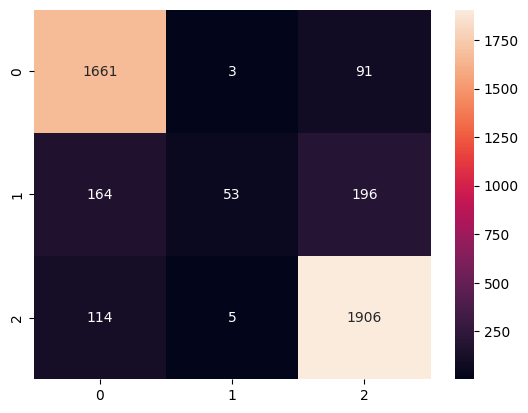

In [26]:
from sklearn.metrics import classification_report

y_train_pred = lr.predict(X_train)
classification_report_train = classification_report(y_train, y_train_pred)

print(classification_report_train)
sns.heatmap(confusion_matrix_train, annot=True, fmt='d')

In [27]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier().fit(X_train, y_train)
sgd_prediction = sgd.predict(X_test)
print(classification_report(y_test, sgd_prediction))


              precision    recall  f1-score   support

           0       0.81      0.90      0.85       865
           1       0.31      0.05      0.09       204
           2       0.83      0.89      0.86       997

    accuracy                           0.81      2066
   macro avg       0.65      0.61      0.60      2066
weighted avg       0.77      0.81      0.78      2066



In [28]:
from sklearn.svm import SVC
svc = SVC(C=1000).fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
print(classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       865
           1       0.33      0.07      0.11       204
           2       0.84      0.88      0.86       997

    accuracy                           0.81      2066
   macro avg       0.66      0.62      0.61      2066
weighted avg       0.77      0.81      0.78      2066



In [ ]:
from underthesea import sent_tokenize

sentences = []
for review in data["Review Text"]:
    review = str(review)  # Convert to string
    preprocessed_sentences = sent_tokenize(review)
    sentences.extend(preprocessed_sentences)

print(sentences)

In [ ]:
from underthesea import text_normalize

normalized_sentences = []
for sentence in sentences:
    normalized_sentence = text_normalize(sentence)
    normalized_sentences.append(normalized_sentence)

print(normalized_sentences)

In [ ]:
from underthesea import word_tokenize

tokenized_sentences = []
for normalized_sentence in normalized_sentences:
    tokenized_sentence = word_tokenize(normalized_sentence)
    tokenized_sentences.append(tokenized_sentence)

print(tokenized_sentences)

In [ ]:
lowercased_sentences = []
for sentence in tokenized_sentences:
    lowercased_sentence = [word.lower() for word in sentence]
    lowercased_sentences.append(lowercased_sentence)

print(lowercased_sentences)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Define the list of stopwords for Vietnamese and English

stopwords_en = set(stopwords.words('english'))

# Tokenize and remove stopwords
filtered_sentences = []
for sentence in lowercased_sentences:
    filtered_sentence_vn = [word for word in sentence if word.lower() not in stopwords_vn]
    filtered_sentence_en = [word for word in sentence if word.lower() not in stopwords_en]
    filtered_sentences.append(filtered_sentence_vn)
    filtered_sentences.append(filtered_sentence_en)

print(filtered_sentences)

In [ ]:
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

In [ ]:
import re

cleaned_sentences = []
for sentence in filtered_sentences:
    cleaned_sentence = []
    for word in sentence:
        # Remove numbers
        word = re.sub(r'\d+', '', word)
        text = remove_url(text) 
        # Remove punctuation
        word = re.sub(r'[^\w\s]', '', word)
        # Remove duplicate characters within a word
        word = re.sub(r'(\w)\1+', r'\1', word)
        word = re.sub(r'(.)\1{2,}', r'\1', word)
        # Remove HTTP characters within a word
        word = re.sub(r'(http\S+)?(\w+\.)+\S+', r'', word)
        word = handle_emoji(word)
        word = uni.normalize('NFKD', word)
        word = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]', r' ', word)
        # Add cleaned word to the sentence
        if word:
            cleaned_sentence.append(word)
    cleaned_sentences.append(cleaned_sentence)

print(cleaned_sentences)

In [ ]:
word_replacements = leet = {
    "1": "i",
    "3": "e",
    "4": "a",
    "5": "s",
    "7": "t",
    "0": "o",
    "@" :"a",
    "/\ ": "a",
    "/-\ ": "a",
    "*" : "a",
    "ä" : "a",
    "á" :"a",
    "à" : "a",
    "â" : "a",
    "a^": "a",
    "ã" : "a",
    "å" : "a",
    "ą" : "a",
    "ª" : "a",
    "∀" : "a",
    "∧" : "a",
    "α" : "a",
    "8" : "b",
    "|3": "b",
    "13": "b",
    "ß" : "b",
    "þ" : "b",
    "v" : "b",
    "ć" : "c",
    "č" : "c",
    "ç" : "c",
    "©" : "c",
    "σ" : "c",
    "(" : "c",
    "¢" : "c",
    "<" : "c",
    '[' : "c",
    '©': "c",
    "[)" : "d",
    "|>" : "d",
    "|)" : "d",
    "|]": "d",
    "3" : "e",
    "€" : "e",
    "є" : "e",
    "[-": "e",
    "|=" : "f",
    "ƒ" : "f",
    "/=": "f",
    "6" : "g",
    "(_+": "g",
    "#" : "h",
    "/-/" : "h",
    "[-]" : "h",
    "]-[" : "h",
    ")-(" : "h",
    "(-)" : "h",
    ":-:" : "h",
    "|~|" : "h",
    "|-|" : "h",
    "]~[" : "h",
    "}{" : "h",
    "1" : "i",
    '!' : "i",
    "|" : "i",
    "][" : "i",
    "]" : "i",
    ":": "i",
    "_|" : "j",
    "_/" : "j",
    "¿" : "j",
    "(/" : "j",
    "ʝ" : "j",
    ";" : "j",
    "X" : "k",
    "|<" : "k",
    "|{" : "k",
    "ɮ" : "k",
    "£" : "l",
    "1_" : "l",
    "ℓ" : "l",
    "|_" : "l",
    "[_": "l",
    "|V|" : "m",
    "|\/|" : "m",
    "/\/\ " : "m",
    "/V\ ": "m",
    "|V" : "n",
    "|\|" : "n",
    "/\/" : "n",
    "[\]" : "n",
    "/V" : "n",
    "[]" : "o",
    "0" :"o" ,
    "()" : "o",
    "°" : "o",
    "|*" : "p",
    "|o" : "p",
    "|º" : "p",
    "|°" : "p",
    "/*" : "p",
    "¶" : "q",
    "(_,)" : "q",
    "()_" : "q",
    "0_" : "q",
    "°|" : "q",
    "<|" : "q",
    "®" : "r",
    "2" : "r",
    "|?" : "r",
    "/2" : "r",
    "®" : "r",
    "Я" : "r",
    "|2": "r",
    "§" : "s",
    "5" : "s",
    "$" : "s",
    "_/¯": "s",
    "7" : "t",
    "†" : "t",
    "¯|¯" : "t",
    "(_)" : "u",
    "|_|" : "u",
    "L|" : "u",
    "µ": "u",
    "\/" : "v",
    "|/" : "v",
    "\/\/" : "w",
    "vv" : "w",
    "\//" :"w",
    "\^/" : "w",
    "\V/" : "w",
    "\|/" : "w",
    "\_|_/" : "w",
    "\_:_/" : "w",
    "><": "x",
    "}{" : "x",
    "×" : "x",
    ")(" : "x",
    " `/" : "y",
    "φ" : "y",
    "¥" : "y",
    "\/": "y",
    "≥" : "z",
    "7_" : "z",
    ">_": "z",
    "youre": "you are",
    "im": "I am",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "I have",
    "id": "I would",
    "theyre": "they are",
    "theres": "there is",
    "ko": "không",
    "t": "tôi",
    "m": "mình",
    "mày": "em",
    "tao": "anh",
    "dc": "được",
    "hok": "không",
    "ngta": "người ta",
    'bsau': "bữa sau",
    "k":'không'
}

replaced_sentences = []
for sentence in cleaned_sentences:
    replaced_sentence = [word_replacements.get(word, word) for word in sentence]
    replaced_sentences.append(replaced_sentence)

print(replaced_sentences)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xt = tfidf.fit_transform(data['Review Text'])
y = data['sentiment']

In [ ]:
replaced_sentences

In [ ]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(joined_sentences)

# Apply StandardScaler to the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

# Use the scaled features for further training or analysis
print(X_scaled)

In [ ]:
# Check the shapes of the input arrays
print(X_scaled.shape)
print(data["sentiment"].shape)

In [ ]:
# Make sure that all input arrays have the same number of samples
assert X_scaled.shape[0] == data["sentiment"].shape[0]

In [ ]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X_scaled, data["sentiment"], test_size=0.2, random_state=42)

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#lemmatizer = WordNetLemmatizer()
word_replacements = {}  # Make sure you define this dictionary if you use it.

def clean_text(data):

    # remove hashtags and @usernames
    data = re.sub(r'http\S+', '', data)
    data = re.sub('[^a-zA-Z]', ' ', data)

    data = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", data)
    data = re.sub("(\\d|\\W)+", " ", data)
    data = re.sub(r'\d+', '', data)

    # Lowering Text
    data = data.lower()
    data = data.split()

    # Lemmatizing words
    # data = [lemmatizer.lemmatize(word) for word in data if not word in stuff_to_be_removed]

    # Removing Stop-words (Uncomment if needed)
    # stopwords_dict = {word: 1 for word in stopwords.words("english")}
    data = [word for word in data if word not in stuff_to_be_removed]

    # Word replacements (You should have word_replacements defined)
    data = [word_replacements.get(word, word) for word in data]

    # Joining the list of words into a single string
    data = ' '.join(data)
  
    return data